In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**LIBRARIES**

In [ ]:
import os
import numpy as np
import pandas as pd
#
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as mt
from sklearn.model_selection import KFold, train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/final1.csv", names=["Song","Artist","Popularity","Dance","Energy","Acoustic","Instrumental","Happy","Speech","Live","Loud","Tempo","Id","Label"] , encoding='latin-1')
df.head(-100)

,Song,Artist,Popularity,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Tempo,Id,Label
0,Belle Vie De Tous Les Jours,Baudouin BÃ©ringer,61,33,1,99,93,37,5,11,-26 db,83,3irfOZS30z0snSh5vOPs2V,3
1,Bla?regn,Jacob David,64,29,13,97,95,56,17,11,-30 db,171,3a2fZ1oqZMDnjFI5ANACiz,3
2,RÃªvasser,LuciÃ©n,67,37,2,98,92,8,3,11,-34 db,119,2rBLJwsNjWvSx0yVAQLc3B,3
3,am ersten Tag,Hugo Vanbrooke,55,24,3,99,91,17,5,10,-33 db,64,2gwhISMkdlhEqEP60P93Z1,3
4,Everlasting,Cassandra Nestico,66,43,4,98,94,10,4,10,-30 db,82,6U0Rth9EM8xwmg7rtrKV3t,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,Lord Pretty Flacko Jodye 2 (LPFJ2),A$AP Rocky,71,49,72,1,0,5,13,5,-6 db,208,1j6kDJttn6wbVyMaM42Nxm,2
2385,Ball If I Want To,DaBaby,80,90,67,16,0,63,46,7,-5 db,140,0cu0rhnlCnJ7JIeHRiLpj3,2
2386,Plain Jane,A$AP Ferg,77,80,84,7,0,52,28,9,-5 db,170,4dVpf9jZjcORqGTLUaeYj9,2
2387,Harder Than My Demons,Big Sean,58,74,74,9,0,40,11,21,-6 db,107,23XTYrwfHXY8H1PuQYJbDA,2


In [ ]:
#How many cells are missing values (NaN or None) in total?
df.isnull().sum().sum()

0

In [ ]:
#How many rows are there where the attributes don't take values?
df.isnull().sum()

Song            0
Artist          0
Popularity      0
Dance           0
Energy          0
Acoustic        0
Instrumental    0
Happy           0
Speech          0
Live            0
Loud            0
Tempo           0
Id              0
Label           0
dtype: int64

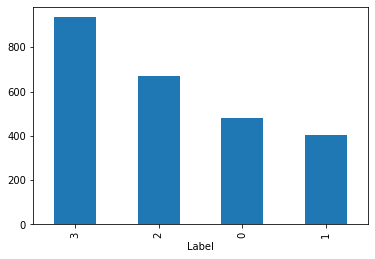

In [ ]:
#How many Happy,Sad,Energetic and Calm Songs We Have
df.value_counts("Label").plot(kind="bar")

In [ ]:
df.Label.unique()

array([3, 0, 1, 2])

In [ ]:
label_to_text={0:"happiness",1:"sadness",2:"Energetic",3:"calm"}

In [ ]:
from numpy import genfromtxt
myArray = np.genfromtxt("/content/drive/MyDrive/final1.csv", delimiter=',' , usecols=(3,4,5,6,7,8,9,11))
second = myArray[1,:]

In [ ]:
myArray.shape

(2489, 8)

In [ ]:
df_dropped=df[["Dance","Energy","Acoustic","Instrumental","Happy","Speech","Live","Tempo","Label"]]
df_dropped

,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Tempo,Label
0,33,1,99,93,37,5,11,83,3
1,29,13,97,95,56,17,11,171,3
2,37,2,98,92,8,3,11,119,3
3,24,3,99,91,17,5,10,64,3
4,43,4,98,94,10,4,10,82,3
...,...,...,...,...,...,...,...,...,...
2484,83,54,14,0,39,21,10,100,2
2485,85,71,2,0,33,24,34,132,2
2486,88,68,8,0,58,28,7,102,2
2487,69,76,14,0,77,40,17,140,2


In [ ]:
from sklearn import preprocessing

df_normalize = df_dropped.copy()
df_normalize[["Dance","Energy","Acoustic","Instrumental","Happy","Speech","Live","Tempo"]] = preprocessing.minmax_scale(df[["Dance","Energy","Acoustic","Instrumental","Happy","Speech","Live","Tempo"]])
df_normalize

,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Tempo,Label
0,0.293478,0.010101,0.99,0.939394,0.368421,0.054945,0.114583,0.236686,3
1,0.250000,0.131313,0.97,0.959596,0.568421,0.186813,0.114583,0.757396,3
2,0.336957,0.020202,0.98,0.929293,0.063158,0.032967,0.114583,0.449704,3
3,0.195652,0.030303,0.99,0.919192,0.157895,0.054945,0.104167,0.124260,3
4,0.402174,0.040404,0.98,0.949495,0.084211,0.043956,0.104167,0.230769,3
...,...,...,...,...,...,...,...,...,...
2484,0.836957,0.545455,0.14,0.000000,0.389474,0.230769,0.104167,0.337278,2
2485,0.858696,0.717172,0.02,0.000000,0.326316,0.263736,0.354167,0.526627,2
2486,0.891304,0.686869,0.08,0.000000,0.589474,0.307692,0.072917,0.349112,2
2487,0.684783,0.767677,0.14,0.000000,0.789474,0.439560,0.177083,0.573964,2


In [ ]:
df_standardize = df_dropped.copy()
standard_scale = preprocessing.StandardScaler()
df_standardize[["Dance","Energy","Acoustic","Instrumental","Happy","Speech","Live","Tempo"]] = standard_scale.fit_transform(df[["Dance","Energy","Acoustic","Instrumental","Happy","Speech","Live","Tempo"]])
df_standardize

,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Tempo,Label
0,-1.223944,-1.238589,1.102439,1.272752,-0.097997,-0.286477,-0.283380,-1.080301,3
1,-1.434207,-0.891650,1.056441,1.318013,0.648398,1.389295,-0.283380,2.066582,3
2,-1.013681,-1.209678,1.079440,1.250121,-1.237231,-0.565772,-0.283380,0.207061,3
3,-1.697036,-1.180766,1.102439,1.227490,-0.883675,-0.286477,-0.369860,-1.759741,3
4,-0.698286,-1.151855,1.079440,1.295382,-1.158663,-0.426125,-0.369860,-1.116061,3
...,...,...,...,...,...,...,...,...,...
2484,1.404345,0.293728,-0.852464,-0.831896,-0.019429,1.947886,-0.369860,-0.472380,2
2485,1.509476,0.785226,-1.128450,-0.831896,-0.255132,2.366829,1.705665,0.671941,2
2486,1.667173,0.698491,-0.990457,-0.831896,0.726966,2.925419,-0.629301,-0.400860,2
2487,0.668424,0.929784,-0.852464,-0.831896,1.473360,4.601191,0.235501,0.958021,2


In [ ]:
def defineTargetSaperateTest(df, target_name, test_size_float = 0.15):
  target = df["Label"]
  predictor = df.drop(labels=target_name, axis=1)
  return train_test_split(predictor, target, test_size = test_size_float, random_state = 0)

In [ ]:
def modelResult(x_train,x_test,y_train,y_test):
    lgr = LogisticRegression()
    lgr.fit(x_train, y_train)
    y_pred = lgr.predict(x_test)
    print(f"Lojistik Result: ", mt.accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
def forestResult(x_train,x_test,y_train,y_test):
    forest= RandomForestClassifier()
    forest.fit(x_train, y_train)
    y_pred = forest.predict(x_test)
    print(f"Random Forest Result:" ,mt.accuracy_score(y_test, y_pred))

In [ ]:
def svmResult(x_train,x_test,y_train,y_test):
    sv = SVC()
    sv.fit(x_train, y_train)
    y_pred = sv.predict(x_test)
    print(f"SVM Result:" ,mt.accuracy_score(y_test, y_pred))

In [ ]:

def linearsvmResult(x_train,x_test,y_train,y_test):
    sv = SVC(kernel='linear')
    sv.kernel
    sv.fit(x_train, y_train)
    y_pred = sv.predict(x_test)
    print(f"Linear SVM Result: " ,mt.accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.model_selection import KFold, train_test_split
x_train,x_test,y_train,y_test = defineTargetSaperateTest(df_dropped, target_name="Label")
lgr_acc = modelResult(x_train,x_test,y_train,y_test)
svm_acc = svmResult(x_train,x_test,y_train,y_test)
lnr_acc=linearsvmResult(x_train,x_test,y_train,y_test)
frst_acc=forestResult(x_train,x_test,y_train,y_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Lojistik Result:  0.8315508021390374
SVM Result: 0.8155080213903744
Linear SVM Result:  0.8368983957219251
Random Forest Result: 0.8823529411764706


In [ ]:
x_train,x_test,y_train,y_test = defineTargetSaperateTest(df=df_normalize, target_name="Label")
lgr_acc = modelResult(x_train,x_test,y_train,y_test)
svm_acc = svmResult(x_train,x_test,y_train,y_test)
lnr_acc=linearsvmResult(x_train,x_test,y_train,y_test)
frst_acc=forestResult(x_train,x_test,y_train,y_test)



Lojistik Result:  0.8128342245989305
SVM Result: 0.8368983957219251
Linear SVM Result:  0.820855614973262
Random Forest Result: 0.8796791443850267


In [ ]:
x_train,x_test,y_train,y_test = defineTargetSaperateTest(df=df_standardize, target_name="Label")
lgr_acc = modelResult(x_train,x_test,y_train,y_test)
svm_acc = svmResult(x_train,x_test,y_train,y_test)
lnr_acc=linearsvmResult(x_train,x_test,y_train,y_test)
frst_acc=forestResult(x_train,x_test,y_train,y_test)




Lojistik Result:  0.8288770053475936
SVM Result: 0.8449197860962567
Linear SVM Result:  0.8342245989304813
Random Forest Result: 0.8770053475935828


Prediction